In [8]:


import torch
from torch import nn
import gensim
import fasttext
from gensim.models import FastText
import random
import operator
from nltk.tokenize import word_tokenize
import pandas as pd
import numpy as np
from tqdm import tqdm
from sklearn.manifold import TSNE
import re
import matplotlib.pyplot as plt

In [2]:
filename = "../clinicalBERT/word2vec+fastText/word2vec+fastText/word2vec.model"

In [3]:
model = gensim.models.KeyedVectors.load(f'{filename}')

      


# load in gensim format
weights = model.wv

# convert to tensor for pytorch
weights = torch.FloatTensor(model.wv.vectors)
print("weights vector shape: ", weights.shape)

# convert to embedding layer
embedding = nn.Embedding.from_pretrained(weights)

print("embedding tensor shape: ", embedding)

words = model.wv.index_to_key
# get the word2vec dictionary {'word':vector}
word2vec = {word: model.wv[word] for word in words}

# get the vec2index array - essentially the vector arrays are in the index position corresponding to the word in word2vec
index2vec = model.wv[model.wv.index_to_key]

# index to words - just a list of words in correct index position

index2word = words
print("length of indices to words: ", len(index2word))



key2index = model.wv.key_to_index

weights vector shape:  torch.Size([44082, 100])
embedding tensor shape:  Embedding(44082, 100)
length of indices to words:  44082


In [4]:
# lets begin by getting the vocab by index and the associated vectors X
vocab = list(model.wv.key_to_index)
X = model.wv[vocab]

In [9]:
# run tsne clustering 

tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

In [13]:
# put into dataframe

df = pd.DataFrame(X_tsne, index=vocab, columns=['x', 'y'])
print(df.shape)
df.head()

(44082, 2)


,x,y
service,21.880339,35.379948
addendum,20.163639,28.839067
radiologic,6.948525,-38.753906
studies,5.716381,-36.339138
also,9.948288,-24.761162


In [29]:
#lets get a subset of words similar to lung
words_lung = []
for item in model.wv.most_similar('lung', topn=20):
    words_lung.append(item[0])
    
words_lung

['hemithorax',
 'uaw',
 'lobe',
 'lll',
 'breat',
 'brth',
 'midlung',
 'crackley',
 'beath',
 'thyroid',
 'breast',
 'rml',
 'deminished',
 'hilar',
 'airspace',
 'infrahilar',
 'rul',
 'thryoid',
 'paramediastinal',
 'lingular']

In [30]:
# thhen get words related to leg
words_leg = []
for item in model.wv.most_similar('leg', topn=20):
    words_leg.append(item[0])
    
words_leg

['arm',
 'hand',
 'foot',
 'ankle',
 'shoulder',
 'elbow',
 'thigh',
 'forearm',
 'lle',
 'wrist',
 'extremity',
 'knee',
 'calf',
 'le',
 'thumb',
 'legs',
 'rle',
 'hip',
 'heel',
 'hallux']

In [31]:
word_subset = words_lung + words_leg

In [35]:
word_subset

['hemithorax',
 'uaw',
 'lobe',
 'lll',
 'breat',
 'brth',
 'midlung',
 'crackley',
 'beath',
 'thyroid',
 'breast',
 'rml',
 'deminished',
 'hilar',
 'airspace',
 'infrahilar',
 'rul',
 'thryoid',
 'paramediastinal',
 'lingular',
 'arm',
 'hand',
 'foot',
 'ankle',
 'shoulder',
 'elbow',
 'thigh',
 'forearm',
 'lle',
 'wrist',
 'extremity',
 'knee',
 'calf',
 'le',
 'thumb',
 'legs',
 'rle',
 'hip',
 'heel',
 'hallux']

In [38]:
#subset these 40 words
subset_df = df.loc[word_subset]
subset_df.shape

(40, 2)

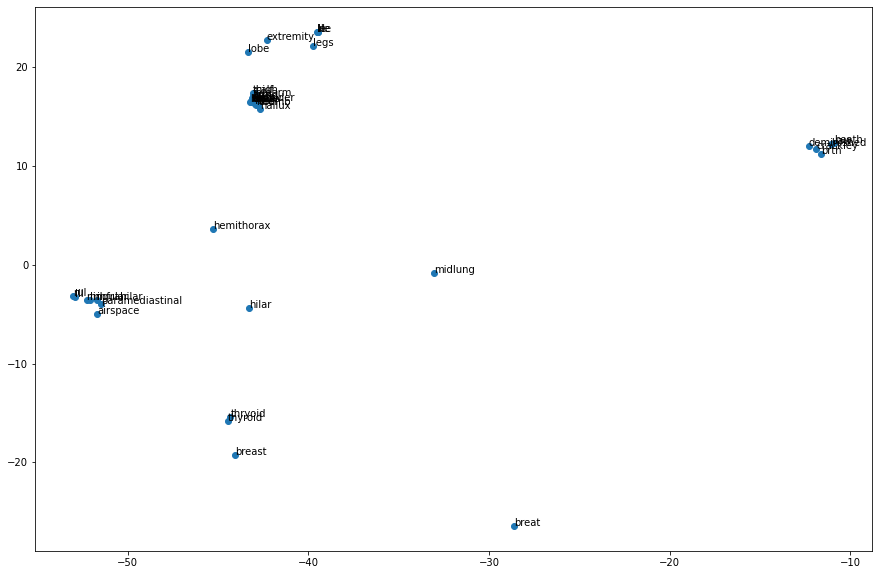

In [40]:
#  build scatter

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1, 1, 1)

ax.scatter(subset_df['x'], subset_df['y'])
for word, pos in subset_df.iterrows():
    ax.annotate(word, pos)
    
plt.show()